In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM,Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

In [81]:
vocab_size=100
max_length=20

In [83]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=vocab_size)

In [85]:
X_train = pad_sequences(X_train,maxlen=max_length,padding='post',truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

In [87]:
model=Sequential([
    Embedding(vocab_size,128,input_length=max_length),
    Bidirectional(LSTM(64,return_sequences=False)),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
])
    
    

In [89]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
history=model.fit(X_train,y_train,epochs=5,validation_split=0.2,batch_size=32,verbose=1)

Epoch 1/5
428/625 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5268 - loss: 0.6912

KeyboardInterrupt: 

In [55]:
test_loss,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print(f"Test_accuracy : {test_accuracy*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5899 - loss: 0.6592
Test_accuracy : 59.10%


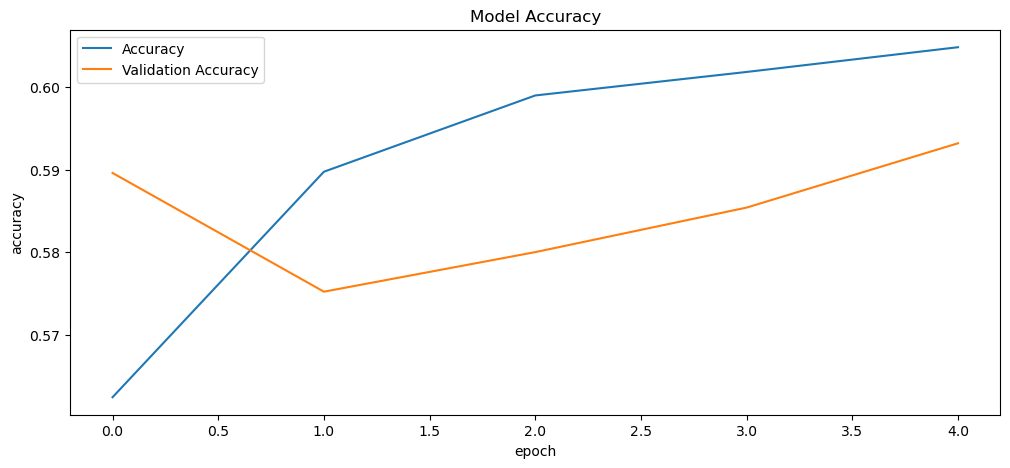

In [69]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [93]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2

def predict_review(text):
    words = text.lower().split()
    encoded = [1]  # Start token
    for word in words:
        idx = word_index.get(word, 2)  # Unknown = 2
        if idx < vocab_size:  # Only keep if in allowed vocab range
            encoded.append(idx)
        else:
            encoded.append(2)  # Treat as unknown
    padded = keras.preprocessing.sequence.pad_sequences([encoded], maxlen=max_length, padding='post', truncating='post')
    prediction = model.predict(padded)[0][0]
    print("\nReview:", text)
    print("Sentiment:", "Positive 😊" if prediction > 0.5 else "Negative 😞")


# 5. Just type your review here 👇
predict_review("I really loved this movie!")
predict_review("It was good.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step

Review: I really loved this movie!
Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Review: It was good.
Sentiment: Negative 😞
